# Kernel Regression

참고한 페이지: https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.kernel_regression.KernelReg.html

```statsmodels```에 Nonparametric kernel regression이 구현되어 있다.

해당 모듈을 불러오는 코드는 아래와 같다. 

```statsmodels.nonparametric.kernel_regression.KernelReg(endog, exog, var_type, reg_type='ll', bw='cv_ls', defaults=None)```

조건부 평균(conditional mean) $E[y|X]$를 구한다. (이 때, $y = g(X) + e$) 

사용할 수 있는 ```reg_type```은 두 가지로 다음과 같다 ...


```local constant``` type of regression provided here is also known as <span style="color:blue"><b>Nadaraya-Watson kernel regression</b></span><br>



```local linear``` is an extension of that which suffers less from bias issues at the edge of the support.<br>

여기서 ```reg_type```을 ```lc```로 설정할 경우 $g(x)$는 Nadaraya-Watson estimator를 사용하게 된다.

Nadaraya-Watson kernel regression은 kernel을 가중치 함수로 사용하여 $\hat{m}$을 로컬 가중치 평균으로 추정할 것을 제안하였다.

Nadaraya-Watson estimator의 수식은 아래와 같다.

$$ w(x, x_i) = { {K_h({{x - x_i}})} \over {\sum^{n}_{j=1}K_h({{x - x_j}})} } $$

$$\hat{m_h}(x) = {{\sum^{n}_{i=1}}}w(x, x_i)*y_i =  {{\sum^{n}_{i=1} } {{K_h(x-x_i)y_i} \over {\sum^{n}_{j=1}K_h(x-x_j)}}}= {{\sum^{n}_{i=1}}} \left({{{K({{x-x_i}\over h})y_i}} \over {\sum^{n}_{j=1}K({{x-x_j}\over h})}} \right)$$


$w$는 커널 가중치를 의미한다. 가중치의 총 합은 1이다.

$\hat{m_h}(x)$는 Nadaraya-Watson estimator로 결과값은 샘플 데이터($x_i$)의 추정치($\hat{y_i}$ ; conditional mean)를 의미한다.

$K_h$는 bandwidth $h$를 쓰는 Kernel이다. Kernel은 사용자가 임의로 설정할 수 있다. Uniform, Gaussian 등등...

.
.
.

근데 수식보단 예시를 보면서 이해하는게 더 빠르다.

# Case 1

관측된 데이터가 다음과 같다고 하자.
<img src="img/KR_02.PNG">

이 때 <b>거리(50)</b>에 대한 Gaussian Kernel은 다음과 같이 구한다. (Gaussian Kernel은 $K_h(x) = {1 \over {\sqrt{2 \pi}}} e^{-0.5 ({ {x - x_i} \over {h} })^2}$)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

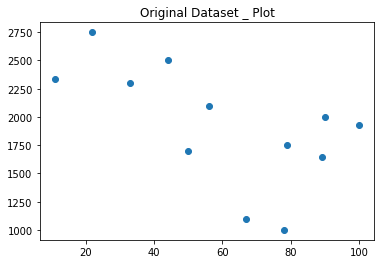

In [7]:
x_i = np.array([11,22,33,44,50,56,67,79,78,89,90,100])
y_i = np.array([2337,2750,2301,2500,1700,2100,1100,1750,1000,1642,2000,1932])

plt.scatter(x_i, y_i)
plt.title("Original Dataset _ Plot")
plt.show()

여기서 거리가 50인 곳의 유량을 중심으로 Gaussian Kernel을 구하면 다음과 같다.

In [9]:
x_i = 50
x_j = np.linspace(1,110,110)
h = 10 #bandwidth 

#가우시언 커널
def Gaussian_K(i,j,h):
    K = (1/np.sqrt(2*np.pi)) * (np.exp( -0.5* (((j-i)/h))**2 ))
    return K

K_result = list()

for j in x_j:
    K_result.append(Gaussian_K(x_i,j,h))

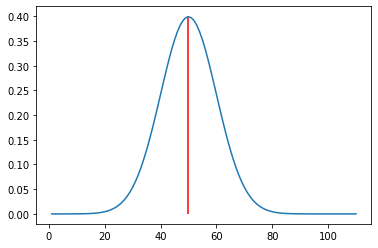

In [10]:
plt.plot(x,K_result)
plt.vlines(50,0,0.4,colors='r')
plt.show()

이번엔 전체 데이터셋의 Gaussian Kernel을 모두 구해보자

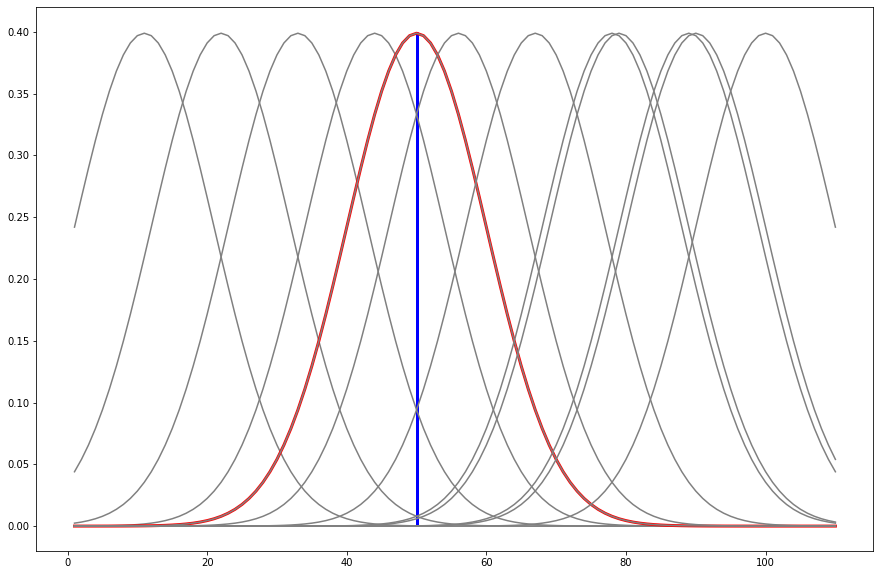

In [6]:
x_i = np.array([11,22,33,44,50,56,67,79,78,89,90,100]) #거리_x
x_j = np.linspace(1,110,110) #유량_y
h = 10 #bandwidth

K_total = np.zeros((110,))

plt.figure(figsize=(15,10))
for i in x_i:
    
    K_result = list()
    
    for j in x_j:
        K_result.append(Gaussian_K(i,j,h))
        
    if i == 50:
        plt.plot(x_j, K_result, c='r', lw=3) #거리(50)은 그래프를 빨간색으로 표현
        
    plt.plot(x_j, K_result, c='grey') #거리(50)을 제외한 모든 그래프는 회색으로 표현
    
    K_total += np.array(K_result)

#plt.plot(x_j, K_total/len(x_i), c='green') #주어진 데이터에 대한 KDE 그래프

plt.vlines(50,0,0.4,colors='b',lw=3)

plt.show()

<img src="img/KR_03_re.PNG">

In [20]:
#statsmodels 패키지를 사용하여 실행해보자.

import statsmodels as sm
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [27]:
x_label = np.array([11,22,33,44,50,56,67,70,78,89,90,100])
y_label = np.array([2337,2750,2301,2500,1700,2100,1100,1750,1000,1642,2000,1932])

In [28]:
def model_kr_bw(band_width_number = 'auto'):
    
    #train
    if band_width_number == 'auto':
        model_kr = sm.nonparametric.kernel_regression.KernelReg(y_label, x_label, var_type='c', reg_type='lc')
        print('Bandwidth value: ',model_kr.bw)
        
    else:
        model_kr = sm.nonparametric.kernel_regression.KernelReg(y_label, x_label, var_type='c', reg_type='lc', bw=[band_width_number])
   
    #predict
    #커널은 default로 가우시안을 사용한다
    pred_y = model_kr.fit(x_label)
    
    #make a plot
    plt.scatter(x_label, y_label)
    plt.plot(x_label, pred_y[0], c='r')
    plt.title("Bandwidth value = " + str(band_width_number))
    plt.show()
    
    return pred_y

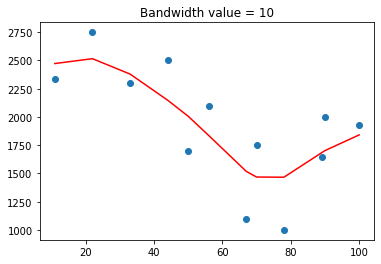

거리50 추정치:  2006.3722024630072


In [29]:
y_result = model_kr_bw(10)
print("거리50 추정치: ",y_result[0][4])

#### Conditional Mean (조건부기대함수; Conditional Expectation Function: CEF)

Definition
조건부확률변수 $Y|X=x$의 조건부기대값은

$\hspace{2cm}$* 이산형 $\rightarrow$ $E(Y|X=x) = \sum_yy*f(y|x)$

$\hspace{2cm}$* 연속형 $\rightarrow$ $E(Y|X=x) = \int_{-\infty}^{\infty} y*f(y|x)dy$

여기서 $y_i \Subset Y$일 때, $y_i$값에 그 $y_i$에 해당하는 <i>조건부확률</i>을 곱해주어서 $Y$의 평균을 내도록 하는 것이다.

# Case 2

In [96]:
import statsmodels as sm
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [80]:
x_label = np.linspace(-10,10,100) 
y_label = [np.sin(x)+(np.random.randn()/4) for x in x_label] #sin그래프에 노이즈를 부여함

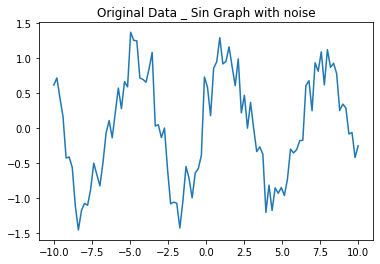

In [151]:
plt.plot(x_label, y_label)
plt.title("Original Data _ Sin Graph with noise")
plt.show()

In [157]:
def model_kr_bw(band_width_number = 'auto'):
    
    #train
    if band_width_number == 'auto':
        model_kr = sm.nonparametric.kernel_regression.KernelReg(y_label, x_label, var_type='c', reg_type='lc')
        print('Bandwidth value: ',model_kr.bw)
        
    else:
        model_kr = sm.nonparametric.kernel_regression.KernelReg(y_label, x_label, var_type='c', reg_type='lc', bw=[band_width_number])
   
    #predict
    #커널은 default로 가우시안을 사용한다
    pred_y = model_kr.fit(x_label)
    
    #make a plot
    plt.plot(x_label, y_label)
    plt.plot(x_label, pred_y[0], c='r')
    plt.title("Bandwidth value = " + str(band_width_number))
    plt.show()

다음 그래프를 통해서 bandwidth 값에 따른 Smoothing 정도를 비교해볼 수 있다.

Bandwidth value:  [-0.26044587]


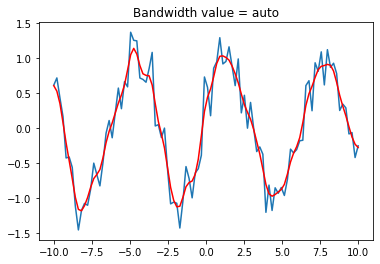

In [158]:
model_kr_bw()

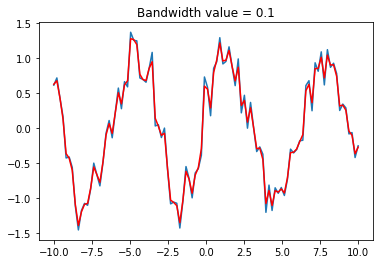

In [147]:
model_kr_bw(0.1)

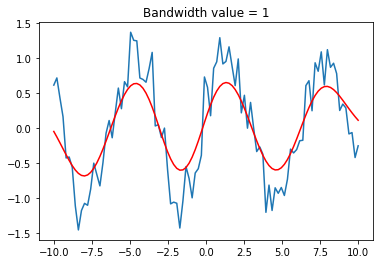

In [148]:
model_kr_bw(1)

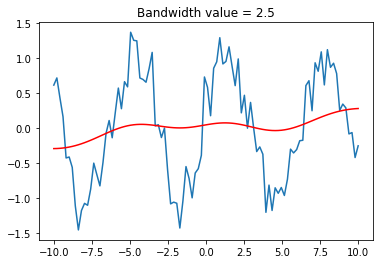

In [149]:
model_kr_bw(2.5)

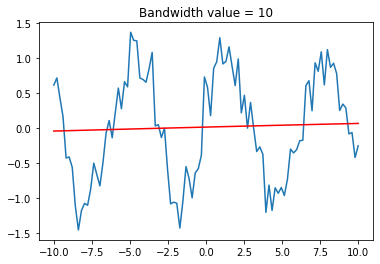

In [150]:
model_kr_bw(10)

참고 사이트


1. 확률밀도함수<br>
https://darkpgmr.tistory.com/147


2. 조건부기댓값<br>
https://www.youtube.com/watch?v=r-pw6yMOSGI&t=202s


3. Kernel Regression<br>
https://towardsdatascience.com/regression-kernel-and-nearest-neighbor-approach-6e27e5e955e7<br>
https://en.wikipedia.org/wiki/Kernel_regression#Nadaraya%E2%80%93Watson_kernel_regression<br>
 https://en.wikipedia.org/wiki/Kernel_smoother<br>
https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.kernel_regression.KernelReg.html